# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ="../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_bin.csv"
data = pd.read_csv(path)
data.reset_index
data.round(5)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,428,429,430,431,432,433,434,435,436,437
0,1,-0.017791,-0.245300,0.463568,-0.517827,-0.355514,0.487726,0.482991,-0.339176,0.662390,...,-0.625847,0.461229,-0.598586,0.767162,0.414474,0.245944,-0.989470,-0.252575,0.261593,0.291109
1,0,0.110768,0.574821,0.105035,-0.470658,-1.425475,0.535306,0.419043,0.163311,0.275816,...,-0.661165,-0.380656,0.244910,0.683573,-0.592842,0.038613,0.628091,-0.130931,-0.041118,-0.899655
2,1,0.001459,0.880947,-0.013048,-0.862418,-1.298104,0.784262,-0.053569,-0.193600,0.001717,...,-0.642589,-0.474344,0.428170,0.699182,-0.055734,0.590347,0.470508,-0.353349,-0.053301,-0.224115
3,0,0.062937,0.368952,-0.551430,0.313969,0.537392,-0.051345,-0.128191,-0.052663,0.022732,...,0.170213,-0.524737,0.457968,-0.350422,-0.153530,0.009347,-0.301081,-0.300408,0.130717,-0.096597
4,1,0.207857,0.284800,0.107111,-0.556411,-1.325310,0.267002,0.502943,-0.133496,0.225408,...,-0.396248,-0.215058,-0.150988,0.429753,-0.210586,0.285608,0.605913,-0.250192,0.251523,-0.497216


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.017791 -0.245300  0.463568 -0.517827 -0.355514  0.487726  0.482991   
1    0.110768  0.574821  0.105035 -0.470658 -1.425475  0.535306  0.419043   
2    0.001459  0.880947 -0.013048 -0.862418 -1.298104  0.784262 -0.053569   
3    0.062937  0.368952 -0.551430  0.313969  0.537392 -0.051345 -0.128191   
4    0.207857  0.284800  0.107111 -0.556411 -1.325310  0.267002  0.502943   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.097058  0.170209  0.076273 -0.483340 -0.977704  0.420521  0.228634   
177 -0.155079 -0.147931 -0.948970 -0.418657  0.217772 -0.511356 -0.288000   
178 -0.281101  0.346973  0.178181 -0.358279 -0.779175  0.444296 -0.073569   
179  0.006101  0.110437  0.175757 -0.590025 -0.952412  0.304226  0.129646   
180  0.413711  0.760893  0.515536 -0.342198 -0.715016  0.434291 -0.205907   

            7         8         9  ...       428       429       430  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.5946


C:\Users\sandr\AppData\Local\Temp/ipykernel_5312/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_5312/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


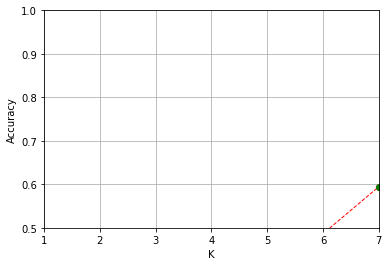

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Estudio de la mejor métrica
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000001B0F8B2E280>,
                     n_neighbors=7)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
142,0,1,1
14,1,1,1
134,0,1,1
140,1,1,1
78,0,1,1


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters: " +str(np.mean(result1)))
print("Best result of the cross validation of the model (mahattan) with the best paramters:: " +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters: 0.5426108374384236
Best result of the cross validation of the model (mahattan) with the best paramters:: 0.5495073891625616


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.7013888888888888
Final accuracy on the testing dataset (manhattan): 0.5405405405405406


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[46 22]
 [21 55]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68        68
           1       0.71      0.72      0.72        76

    accuracy                           0.70       144
   macro avg       0.70      0.70      0.70       144
weighted avg       0.70      0.70      0.70       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 6 14]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.56      0.70      0.62        20

    accuracy                           0.54        37
   macro avg       0.53      0.53      0.52        37
weighted avg       0.53      0.54      0.53        37

